In [2]:
import numpy as np
import pandas as pd

In [3]:
df=pd.read_csv('titanic.csv')
df.head()             

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [4]:
df.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   survived     891 non-null    int64  
 1   pclass       891 non-null    int64  
 2   sex          891 non-null    object 
 3   age          714 non-null    float64
 4   sibsp        891 non-null    int64  
 5   parch        891 non-null    int64  
 6   fare         891 non-null    float64
 7   embarked     889 non-null    object 
 8   class        891 non-null    object 
 9   who          891 non-null    object 
 10  adult_male   891 non-null    bool   
 11  deck         203 non-null    object 
 12  embark_town  889 non-null    object 
 13  alive        891 non-null    object 
 14  alone        891 non-null    bool   
dtypes: bool(2), float64(2), int64(4), object(7)
memory usage: 92.4+ KB


In [ ]:
#frequency table of categorical variables

In [6]:
# Absolute frequencies
df['pclass'].value_counts()

pclass
3    491
1    216
2    184
Name: count, dtype: int64

In [7]:
abs_freq = pd.crosstab(index=df['pclass'], columns='absolute_frequency')
print(abs_freq)

col_0   absolute_frequency
pclass                    
1                      216
2                      184
3                      491


In [8]:
# Relative frequencies
df_rel = (df['pclass'].value_counts())/df.shape[0]
print(df_rel)

pclass
3    0.551066
1    0.242424
2    0.206510
Name: count, dtype: float64


In [9]:
#normalize is used find relative freq. of uni. categ.
df_rel = df['pclass'].value_counts(normalize=True)
print(df_rel)

pclass
3    0.551066
1    0.242424
2    0.206510
Name: proportion, dtype: float64


In [10]:
#cummalative frequecies
df_cum = df['pclass'].value_counts().cumsum()
print(df_cum)

pclass
3    491
1    707
2    891
Name: count, dtype: int64


In [11]:
#joint,marginal and conditional frequencies
pd.crosstab(df['sex'], df['alive'].map({'no': 'Survived = 0', 'yes': 'Survived = 1'}), margins=True)

alive,Survived = 0,Survived = 1,All
sex,,,
female,81,233,314
male,468,109,577
All,549,342,891


In [12]:
# Total number of rows
total_passengers = df.shape[0]

# Number of females who survived
female_survived = (df[(df['sex'] == 'female') & (df['alive'] == 'yes')]).shape[0]

# Joint probability
joint_prob = female_survived / total_passengers

print(f"Joint Probability P(sex='female' ∩ survived=1): {joint_prob}")

Joint Probability P(sex='female' ∩ survived=1): 0.2615039281705948


In [13]:
# Marginal Probability

# Total number of passengers
total = df.shape[0]

# Number of females
female_count = df[df['sex'] == 'female'].shape[0]

# Marginal probability
p_female = female_count / total

print(f"P(sex = female): {p_female}")

P(sex = female): 0.35241301907968575


In [14]:
total = df.shape[0]
survived_count = df[df['survived'] == 1].shape[0]
p_survived = survived_count / total
print(f"P(survived = 1): {p_survived}")

P(survived = 1): 0.3838383838383838


In [15]:
#conditional probabilty

# Total number of survivors
total_survived = df[df['alive'] == 'yes'].shape[0]

# Number of females who survived
female_survived = df[(df['sex'] == 'female') & (df['alive'] == 'yes')].shape[0]

# Conditional probability
p_female_given_survived = female_survived / total_survived

print(f"P(sex = female | survived = 1): {p_female_given_survived}")

P(sex = female | survived = 1): 0.6812865497076024


In [16]:
total_female = df[df['sex'] == 'female'].shape[0]
survived_female = df[(df['sex'] == 'female') & (df['alive'] == 'yes')].shape[0]
p_survived_given_female = survived_female / total_female
print(f"P( survived = 1 | sex = female): {p_survived_given_female}")

P( survived = 1 | sex = female): 0.7420382165605095


In [17]:
#correlation
df_num = df[['age', 'fare']]
df_cleaned = df_num.dropna()

correlation = df_cleaned.corr(method = 'pearson')
print('pearson correlation matrix')
print(correlation)

pearson correlation matrix
           age      fare
age   1.000000  0.096067
fare  0.096067  1.000000


<Axes: >

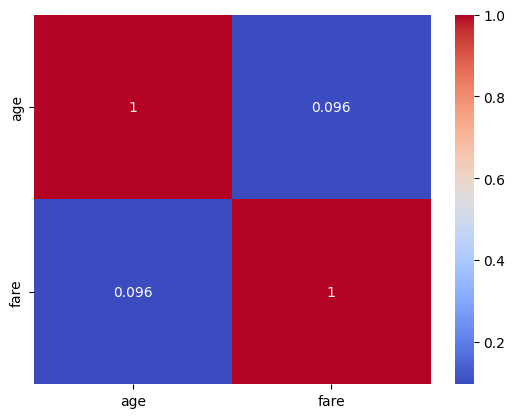

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(correlation, annot=True, cmap='coolwarm')

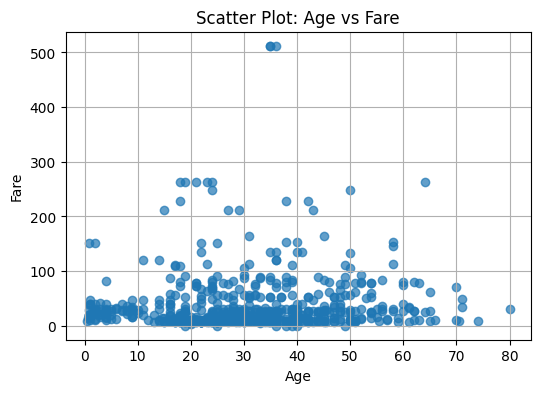

In [20]:
plt.figure(figsize=(6, 4))
plt.scatter(df_cleaned['age'], df_cleaned['fare'], alpha=0.7)
plt.xlabel('Age')
plt.ylabel('Fare')
plt.title('Scatter Plot: Age vs Fare')
plt.grid(True)
plt.show()

In [ ]:
# corellation interpretation:
# positive correlation: as one variable increases, the other also tends to increase.
# negative correlation: as one variable increases, the other tends to decrease.
# no correlation: no discernible pattern between the two variables.

<Axes: xlabel='class'>

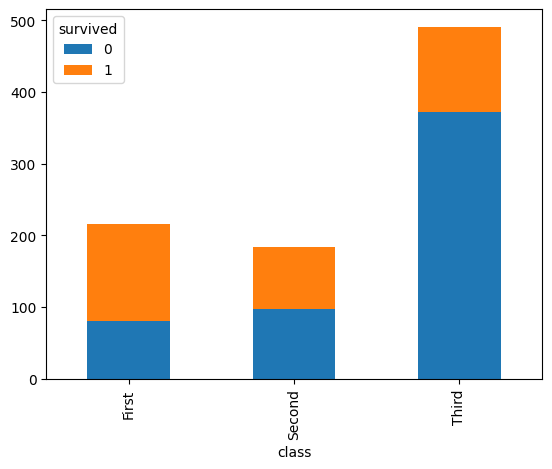

In [21]:
#bonus task
pd.crosstab(df['class'], df['survived']).plot(kind='bar', stacked=True)